<a href="https://colab.research.google.com/github/Jo-Minseok/DataProgramming/blob/main/Future_Temperature_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 동의대학교 데이터과학 프로그래밍 팀 프로젝트 (담당교수: 임환섭)
# 기온 예측(Temperature Predict Programming)

## 중간발표

In [ ]:
#단계 1 : 폰트 설치
import matplotlib.font_manager as fm # 맷플롯립의 폰트 매니저 모듈을 가져와서, fm이라는 이름으로 재정의해서 가져옴.

!apt-get -qq -y install fonts-nanum > /dev/null
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' #폰트 파일 위치
font = fm.FontProperties(fname = font_path, size = 9)
fm._rebuild() #폰트 매니저 재갱신, 새로고침을 하는 것, 이 구문이 없을 경우, 방금 다운한 폰트를 맷플롯립에서 사용할 수 없음.

In [ ]:
#단계 2 : 런타임 재시작
import os #os 모듈 import
os.kill(os.getpid(), 9) #os.getpid()함수로 pid값 = Process Identification Number(현재의 프로세스 ID)라고 하는 값을 얻은 후, os.kill(pid, signal.sigstop) 형식으로, 프로세스 pid에 시그널 sig를 보냄, 호스트 플랫폼에서 사용할 수 있는 구체적인 시그널에 대한 상수는 signal 모듈에 정의되어 있음

In [ ]:
#단계 3 : 한글 폰트 설정
import matplotlib.pyplot as plt # 맷플롯립의 pyplot 모듈을 가져와서, plt라는 이름으로 재정의해서 가져온다는 소리. 
import matplotlib as mpl # 맷플롯립을 mpl이라는 이름으로 재정의해서 가져온다는 소리.
import matplotlib.font_manager as fm # 맷플롯립의 폰트 매니저 모듈을 가져와서, fm이라는 이름으로 재정의해서 가져옴.

#마이너스 표시 문제 해결
mpl.rcParams['axes.unicode_minus'] = False
	
#한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname = font_path, size = 18).get_name()
plt.rc('font', family = font_name)
fm._rebuild()

In [ ]:
import numpy as np # 넘파이를 np 이름으로 임포트
import pandas as pd # 판다스를 pd 이름으로 임포트

path = 'https://github.com/Jo-Minseok/DataProgramming/raw/main/csv/real/' # csv 파일 경로
csv_file1 = path + 'BusanTemperature.csv' # csv_file1 변수에 해당 csv 파일 경로를 대입
tp = pd.read_csv(csv_file1, encoding = 'CP949') # tp 데이터 프레임에 판다스 read_csv로 csv_file1에 있는 csv 파일을 불러오는데, CP949 한글 형식으로 인코딩 하여 가져옴
tp # tp 데이터 출력

,지점,지점명,일시,평균기온(°C),평균최저기온(°C),평균최고기온(°C)
0,159,부산,1905,13.9,11.0,17.9
1,159,부산,1906,13.0,9.5,16.8
2,159,부산,1907,13.5,9.8,17.6
3,159,부산,1908,13.3,9.7,17.2
4,159,부산,1909,13.4,9.7,17.8
...,...,...,...,...,...,...
112,159,부산,2017,15.2,11.7,19.6
113,159,부산,2018,15.1,11.8,19.2
114,159,부산,2019,15.7,12.5,19.8
115,159,부산,2020,15.2,11.9,19.4


In [ ]:
tp.drop(columns = ['지점', '지점명'], axis = 1, inplace = True) # tp 데이터 프레임에 있는 csv파일에서 행에 지점과 지점명 라인을 axis=1(y)축을 드랍시킨 후, tp 데이터 프레임에 저장된 csv파일을 해당 파일로 대체
tp.set_index('일시', inplace = True) # tp데이터 프레임의 index값을 '일시'로 설정 하고, inplace로 tp의 csv파일을 해당 파일로 대체
tp # tp 데이터프레임 출력

,평균기온(°C),평균최저기온(°C),평균최고기온(°C)
일시,,,
1905,13.9,11.0,17.9
1906,13.0,9.5,16.8
1907,13.5,9.8,17.6
1908,13.3,9.7,17.2
1909,13.4,9.7,17.8
...,...,...,...
2017,15.2,11.7,19.6
2018,15.1,11.8,19.2
2019,15.7,12.5,19.8


In [ ]:
x = np.array(tp.index) # x 변수(축)에 tp의 index 값들을 배열로 저장 위의 구문에서 년도를 index로 설정해놨기에, x축은 년도가 됨. 1905~2021
y1 = tp['평균기온(°C)'] # y1 변수에 tp의 평균기온(°C)의 데이터 값들을 저장
y2 = tp['평균최저기온(°C)'] # y2 변수에 tp의 평균최저기온(°C)의 데이터 값들을 저장
y3 = tp['평균최고기온(°C)'] # y3 변수에 tp의 평균최고기온(°C)의 데이터 값들을 저장

Text(0, 0.5, '기온(°C)')

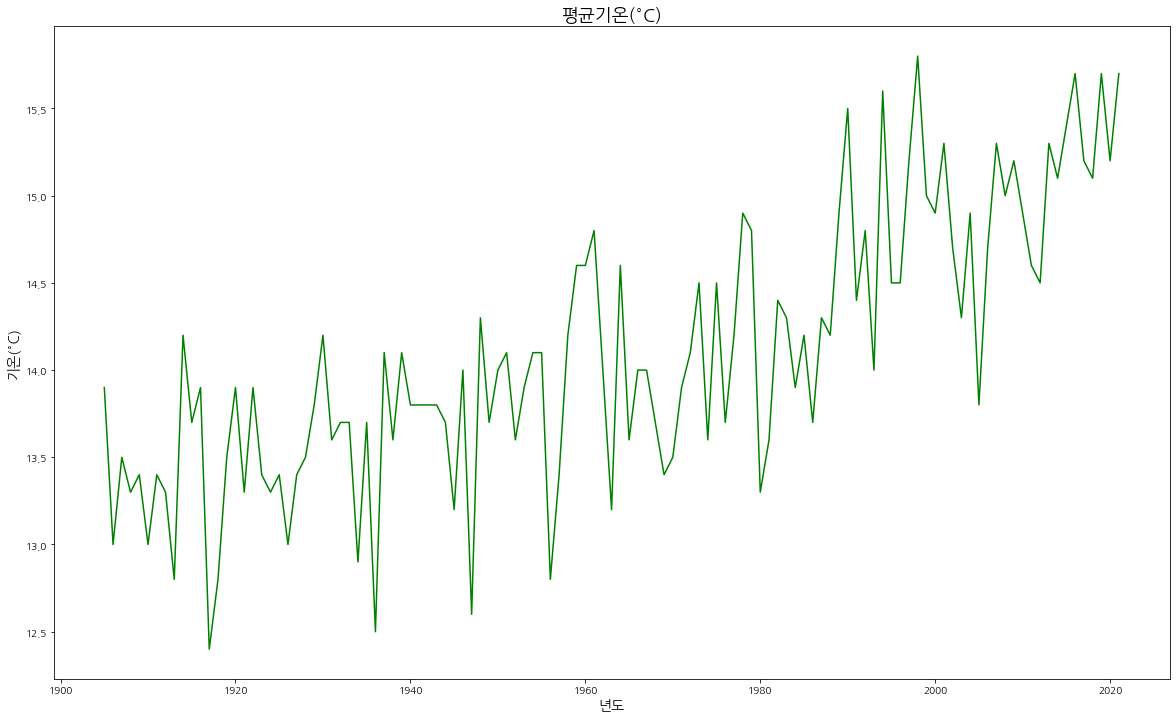

In [ ]:
plt.figure(figsize = (20, 12)) # 표 사이즈를 가로:20, 세로:12 사이즈로 변경
plt.plot(x, y1, 'g') # x 변수에 있는 값을 x축으로, y1 변수에 있는 값을 y축으로 설정 후, 초록색으로 표 출력
plt.title('평균기온(°C)', fontsize = 18) # '평균기온(°C)'을 제목으로 설정하고, 폰트 크기를 18로 설정 
plt.xlabel('년도', fontsize = 14) # 표의 x축 이름을 '년도'로 설정하고, 폰트 크기를 14로 설정
plt.ylabel('기온(°C)', fontsize = 14) # 표의 y축 이름을 '기온(°C)'으로 설정하고, 폰트 크기를 14로 설정

Text(0, 0.5, '기온(°C)')

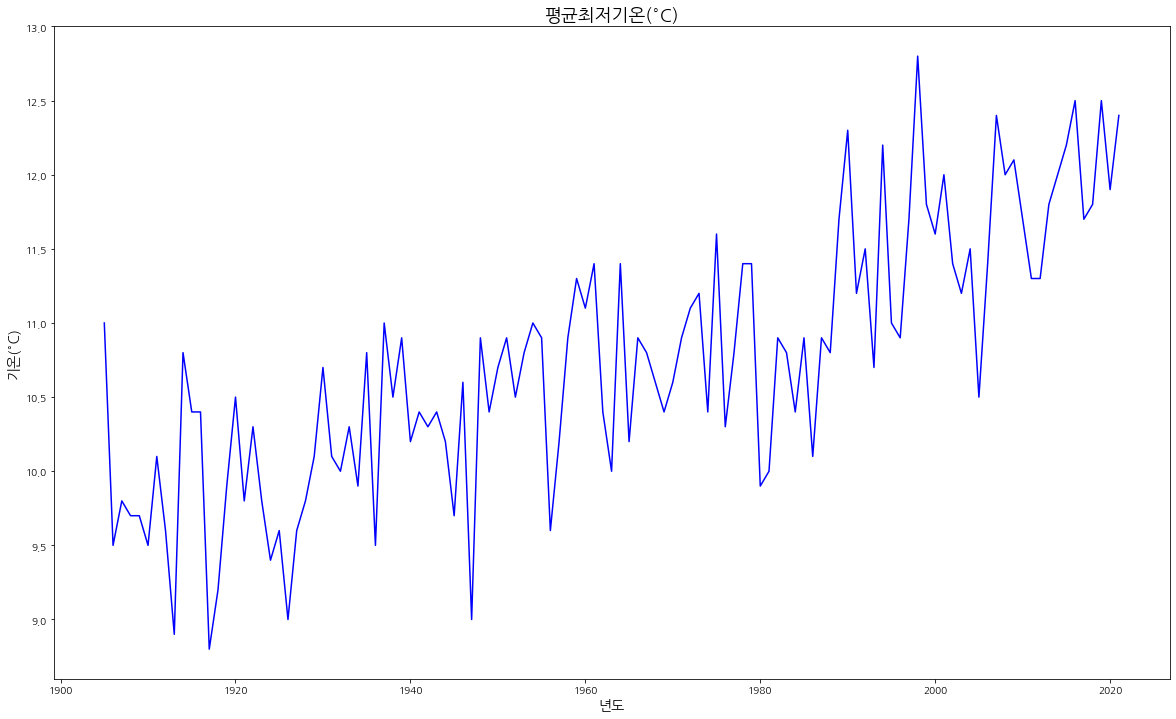

In [ ]:
plt.figure(figsize = (20, 12)) # 표 사이즈를 가로:20, 세로:12로 설정
plt.plot(x, y2, 'b') # 표의 x축에 x 변수의 값들을, y축에 y2 변수에 저장된 값들을 출력 하고 그래프의 색상을 파란색으로 설정
plt.title('평균최저기온(°C)', fontsize = 18) # 표의 제목을 '평균최저기온(°C)'으로 설정 후, 폰트 크기를 18로 설정
plt.xlabel('년도', fontsize = 14) # 표의 x축 이름을 '년도'로 설정하고, 폰트 크기를 14로 설정
plt.ylabel('기온(°C)', fontsize = 14) # 표의 y축 이름을 '기온(°C)'으로 설정하고, 폰트 크기를 14로 설정

Text(0, 0.5, '기온(°C)')

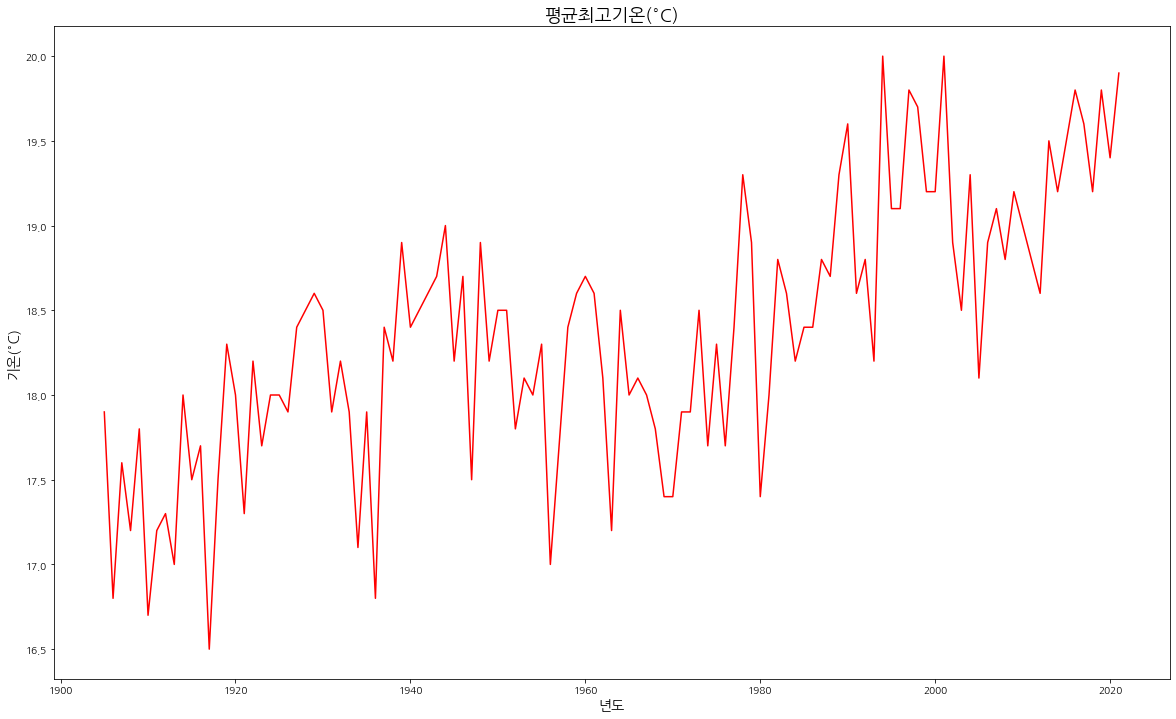

In [ ]:
plt.figure(figsize = (20, 12)) # 표 사이즈를 가로:20, 세로:12로 설정
plt.plot(x, y3, 'r') # 표의 x축에 x 변수의 값들을, y축에 y3 변수에 저장된 값들을 출력 하고 그래프의 색상을 빨간색으로 설정
plt.title('평균최고기온(°C)', fontsize = 18) # 표의 제목을 '평균최고기온(°C)'으로 설정하고, 폰트 크기를 18로 설정
plt.xlabel('년도', fontsize = 14) # 표의 x축 이름을 '년도'로 설정하고, 폰트 크기를 14로 설정
plt.ylabel('기온(°C)', fontsize = 14) # 표의 y축 이름을 '기온(°C)'으로 설정하고, 폰트 크기를 14로 설정

Text(0, 0.5, '기온(°C)')

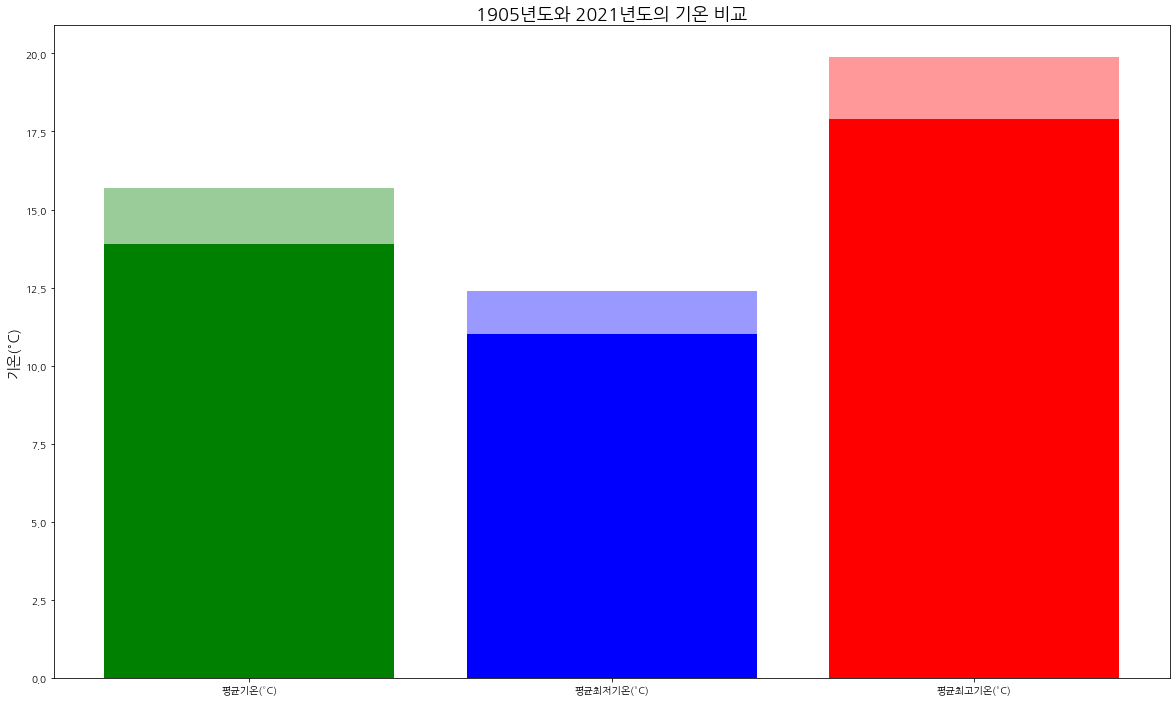

In [ ]:
x = np.arange(3) # x 변수에 넘파이 배열 [0,1,2] 를 저장
xt = ['평균기온(°C)', '평균최저기온(°C)', '평균최고기온(°C)'] # xt 변수에 해당 문자열 리스트를 저장
tp_past = [tp['평균기온(°C)'].iloc[0], tp['평균최저기온(°C)'].iloc[0], tp['평균최고기온(°C)'].iloc[0]] # tp_past 변수에 tp 데이터 프레임의 평균기온, 평균최저기온, 평균최고기온의 0번째 인덱스 값들을 추출하여 리스트화 시킨 후, tp_past(온도_과거형) 변수에 대입시켜 준다.
tp_now = [tp['평균기온(°C)'].iloc[-1], tp['평균최저기온(°C)'].iloc[-1], tp['평균최고기온(°C)'].iloc[-1]] # tp_now 변수에 tp 데이터 프레임의 평균기온, 평균최저기온, 평균최고기온의 -1번째 인덱스 값(제일 마지막)들을 추출하여 리스트화 시킨 후, tp_now(온도_현재형) 변수에 대입시켜 준다. 자료의 년도가 2021년까지임.

plt.figure(figsize = (20, 12)) # 표의 크기를 가로:20, 세로:12 사이즈로 설정
plt.bar(x, tp_past, color = ['green', 'blue', 'red']) # 표를 바 형태로 출력, x축을 x 변수[0,1,2]로 설정하고, 색깔을 초록, 파랑, 빨강으로 설정.
plt.bar(x, tp_now, color = ['green', 'blue', 'red'], alpha = 0.4) # 표를 바 형태로 출력, x축을 x 변수[0,1,2]로 설정하고, 색깔을 초록, 파랑, 빨강으로 설정, 투명도를 40%로 설정
plt.xticks(x, xt) # 그래프에 눈금을 표시하는 형태로, x변수인 [0,1,2]을 대입하고, xt는 ['평균기온(°C)', '평균최저기온(°C)', '평균최고기온(°C)'] 리스트를 대입한다. 즉, 0,1,2 위치에 눈금을 표시하고, 이름은 xt 변수에 있는 문자열들로 설정한다.
plt.title(str(tp.index[0]) + '년도와 ' + str(tp.index[-1]) + '년도의 기온 비교', fontsize = 18) # 표의 제목을 tp변수의 인덱스 0번째에 있는 값 + '년도와 ' + tp변수의 인덱스 -1번째 값(제일 뒤)을 문자열로 변환 후, + "년도의 기온 비교" 로 설정하고, 폰트 크기를 18로 설정
plt.ylabel('기온(°C)', fontsize = 14) # y축 제목을 '기온(°C)'으로 설정 후, 폰트 사이즈 14로 출력

In [ ]:
from sklearn.linear_model import LinearRegression # LinearRegression 함수(선형회귀)를 사이킷런 선형 모델에서 가져온다.
from sklearn.preprocessing import PolynomialFeatures # PolynomialFeautures 함수(다항회귀)를 사이킷런 프로세싱에서 가져온다.
from sklearn.metrics import mean_squared_error # mean_squared_error 함수(mse[평균제곱오차])를 사이킷런 메트릭스에서 가져온다.

#Poly: 다항 선형회귀
#: (단항) 선형회귀

#lr = 단항 선형회귀 모델
#poly_lr = 다항 선형회귀 모델

#x = 1905~2021
#x_pred = 1905~year(원하는 년도)
#poly_x_pred = (x,x^2), x_pred를 Poly 함수에 넣어서 나온 다항식을 저장.
#poly_x = (x,x^2), x를 Poly 함수에 넣어서 나온 다항식을 저장.

#y = tem 평균 기온값들을 배열로 저장
#y_pred = poly_lr.predict(poly_x) 다항 선형회귀 모델에 예측값으로, x를 Poly 식에 넣어서 나온 다항식을 예측한 값을 저장.
#y_predict = x의 값을 대입하여, 선형회귀 예측값을 구함.
#poly_y_predict = poly_lr.predict(poly_x) # poly_y_predict 변수에 poly_lr의 선형회귀 모델의 예측함수에, poly_x(tem.index값(년도)를 다중행, 1열로 만든 배열 대입)) 하여 예측값을 poly_y_predict에 대입함.

#rmse = 루트 평균 제곱 오차
#poly_rmse = 다항 루트 평균 제곱 오차
#diff = 기존 y값(평균온도)와 예측 y값(평균온도 예측) 두개의 차들의 최대값

# Poly (다항회귀)함수 구현부
def Poly(x): # 매개변수 x인 Poly 함수 선언
  poly_features = PolynomialFeatures(degree = 2, include_bias =  False) # PolynomialFeatures 함수를 사용하여, 현재 데이터를 다항식 형태로 변경(degree 옵션으로 차수를 조정{ex.2=2차, 3=3차...} include_bias 옵션은 True로 할 경우 0차항(1)도 함께 만든다.하지만 False이기에, 0차항은 만들지 않는다.)
  # 절편을 안만드는게, 오차범위가 적어서, false로 둠
  return poly_features.fit_transform(x) # 위의 구문에서 poly_features 에 다항식 형태로 변형한 것을, fit_transform() 함수에, Poly 함수에 매개변수로 입력된, x변수를 대입함. x,x^2

# Predict_Temperature 함수 구현부
def Predict_Temperature(tem, year, visual = True): # 디폴트 매개변수를 설정한 visual 변수에 True를 설정합니다.
  x = np.array(tem.index).reshape(-1, 1) # asarray랑 array랑 다른점? asarray는 C++에 있는 참조라고 생각하면 된다. 값을 받고, 이후 원본 값이 바꼈을때, asarray로 입력된 값도 바뀐다. 하지만 array는 값 자체를 복사하기에, 복사 후, 원본 값이 바뀌어도, 복사된 값을 출력할 뿐이다.
  # 즉, tem(평균기온).index(년도)를 배열형으로 만들고,
  # reshape로, 뒤의 열 값은 1이므로, 전체 데이터 크기에 맞게 행이 정해지는 것이 -1이므로, -1을 넣으면 1열의 다중 행을 가지는 배열이 만들어진다. 즉, x는 년도들의 다중 행, 1열
  x_pred = np.arange(tem.index[0], year + 1).reshape(-1, 1) #단항회귀 예측 #x_pred 변수에 np.arange함수를 통해, tem(평균기온).index[0](데이터의 제일 첫 년도) 부터 arange를 하면 year+1의 전까지 되기에 그 수 까지의 배열을 생성한 후, reshape로, 다중 1열 형식으로 변환.
  poly_x = Poly(x) # 다항회귀 x #위의 구문에서 tem.index 값(년도)을 배열로 만들고, 배열 형태를 다중 행, 1열로 만든 배열을 Poly 함수에 대입을 해준다.(안에서 2차 항식 형태로 변경해줌). 반환된 값을, poly_x 값에 대입한다.
  poly_x_pred = Poly(x_pred) #다항회귀 예측 #poly_x_pred 변수에 Poly(x_pred) 함수에서 나온 리턴 값을 저장. x_pred에는 다중 행 1열, 제일 초기년도 ~ 예측하고자 하는 년도+1이 저장된 값들이 있음.
  y = np.array(tem) # y변수에는 tem 평균 기온값들을 배열로 저장.
  
  lr = LinearRegression() # lr = 선형회귀함수를 대입하여 모델 생성
  lr.fit(x, y) # 위에서 만든 선형회귀 모델에 x(년도 다중행 1열),y(tem 평균 기온값 배열)를 대입
  y_predict = lr.predict(x) # y_predict 변수에 lr에서 만든 선형회귀 모델 예측값을 구하는데, predict 함수를 사용하는데, 인자에 x(다중 행, 1열) 년도를 대입. 출력: y예측값
  rmse = np.sqrt(mean_squared_error(y, y_predict)) # 오차의 제곱의 평균을 취한것을 다시 제곱근한다. == rmse(루트 평균 제곱 오차), rmse 변수값에 대입.
  # RMSE:(루트 평균 제곱 오차), MSE : (평균 제곱 오차) RMD (루트 평균 제곱 편차) 및 RMS : (루트 평균 제곱 오차)

  poly_lr = LinearRegression() # poly = 선형회귀함수를 대입하여 모델 생성
  poly_lr.fit(poly_x, y) # 위에서 만든 선형회귀 모델에 poly_x(tem.index값(년도)를 다중 행, 1열로 만든 배열을 Poly함수에 대입하여, x,x^2형태로 변환),y(tem 평균 기온값 배열)를 대입
  poly_y_predict = poly_lr.predict(poly_x) # poly_y_predict 변수에 poly_lr의 선형회귀 모델의 예측함수에, poly_x(tem.index값(년도)를 다중행, 1열로 만든 배열 대입))
  poly_rmse = np.sqrt(mean_squared_error(y, poly_y_predict)) # 오차의 제곱의 평균을 취한것을 다시 제곱근한다. == rmse(루트 평균 제곱 오차), poly_rmse 변수값에 대입

  if rmse > poly_rmse: # rmse(루트 평균 제곱 오차)값이 poly_rmse(루트 평균 제곱 오차)보다 클 경우, 해당 구문들 실행
    lr = poly_lr # lr(선형회귀 모델)에 poly_lr(선형회귀 모델)을 대입 위의 구문에서 poly의 오차값이 적었으므로, lr에 오차가 적은 값을 대입함.
    x_pred = poly_x_pred # x_pred 변수에 poly_x_pred 변수 값(제일 초기년도 ~ 예측하고자 하는 년도+1이 저장된 값들이 있음.)을 대입.
    y_predict = poly_y_predict # y_predict 변수에 poly_y_predict 변수 값(poly_lr.predict(poly_x)한 값)을 대입.

  y_pred = lr.predict(x_pred) # y_pred 변수에 lr 선형회귀로 만든 모델에, 예측 함수를 사용, 인자값으로, x_pred(년도의 배열)을 예측 함수 predict에 대입.
  diff = (y - y_predict).max() # 기존 y값(평균온도)와 예측 y값(평균온도 예측) 두개의 차들의 최대값

  if visual: # 만약 visual 변수가 True일 경우
    plt.figure(figsize = (20, 12)) # 이미지 사이즈를 가로:20, 세로:12 사이즈로 설정합니다.
    plt.plot(x_pred[:, 0], y_pred, c = 'c', label = 'Regression Line') # x값에 x_pred[:,0] 의 0열의 모든 행을 대입, y값에 대입, 색 = 파란색, 라벨 = Regression Line 을 대입
    plt.plot(x_pred[:, 0], y_pred + diff, c = 'g', label = 'Regression Line(Maximum)') # x값에 x_pred(첫 년도 ~ 예측하고자 하는 년도)[:,0] 의 0열의 모든 행을 대입, y값에 , 색 = 초록색, 라벨 = Regression Line(Maximum) 을 대입
    plt.fill_between(x_pred[:, 0], y_pred, y_pred + diff, color = 'magenta', alpha = 0.2) # 두 값 사이를 색을 채우는 함수, x값에, x_pred(첫 년도 ~ 예측하고자 하는 년도)[:,0] 의 0열의 모든 행을 대입, y값에 , 색 = 보라색, 투명도 20%로 설정
    plt.scatter(x_pred[-1, 0], y_pred[-1], c = 'r', s = 120, label = 'Prediction Point') # x값에 x_pred(평균기온 csv의 첫 년도부터 예측을 원하는 값까지의 배열을 다중 행, 1열로 설정한 배열)의 -1행=마지막 행, 0열=년도열을 대입,
    plt.scatter(x_pred[-1, 0], y_pred[-1] + diff, c = 'r', s = 120) # x값에 x_pred(평균기온 csv의 첫 년도부터 예측을 원하는 값까지의 배열을 다중 행, 1열로 설정한 배열)의 -1행=마지막 행, 0열=년도열을 대입, y값에
    plt.scatter(tem.index, y, c = 'r', label = tem.name) # 그래프를 산점도 형식으로하고, x축에는 tem.index(평균 기온 년도들), y에는 tem(평균기온 값 배열)으로 설정하여, 색은 빨간색, 라벨은 '평균기온' 으로 설정
    plt.title(tem.name + ' 회귀 분석' , fontsize = 18) # 그래프의 제목을 tem.name(평균기온) 회귀 분석으로 설정하고, 폰트 사이즈를 18로 설정
    plt.xlabel('년도', fontsize = 14) # 그래프의 x축 표기 이름을 '년도'로 설정하고, 폰트 사이즈를 14로 설정
    plt.ylabel('기온(°C)', fontsize = 14) # 그래프의 y축 표기 이름을 '기온'으로 설정하고, 폰트 사이즈를 14로 설정
    plt.legend(fontsize = 22) # 그래프에 범례를 설정해주고, 범례의 폰트 사이즈를 22로 설정

  return (y_pred, y_pred + diff) # 다항회귀 모델에 poly_x를 넣었을때 나오는 값 y_pred 를 반환, y_pred 에 실 자료 - 예측 자료의 값 중 가장 큰 값을 더해준 값을 반환.

                     선형회귀 예측
-------------------------------------------------------
2100년의 평균기온(°C) 평균값 : 18.843
2100년의 평균기온(°C) 최대값 : 19.93
2021년 대비 평균기온(°C) 상승량(평균값 기준) : 3.143
2021년 대비 평균기온(°C) 상승량(최대값 기준) : 4.23
-------------------------------------------------------


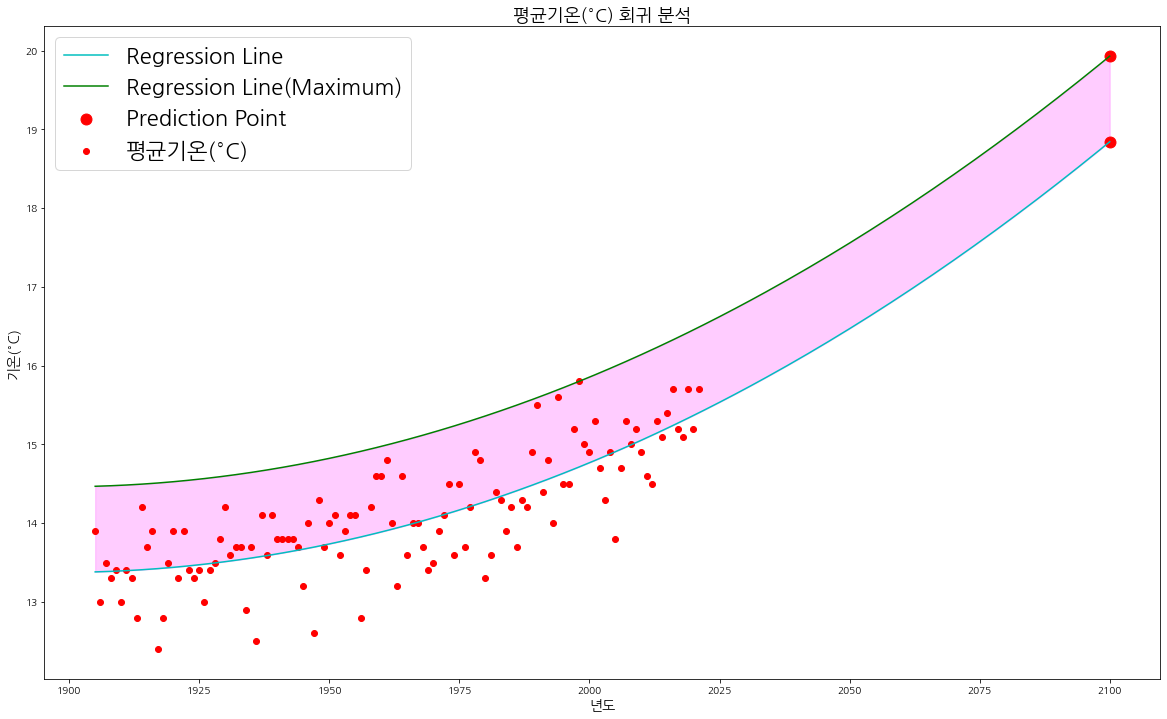

In [ ]:
data = tp['평균기온(°C)'] #평균기온, 평균최저기온, 평균최고기온 설정에 따라 함수 실행 결과가 달라짐 data 변수에 tp 변수에 저장된 csv 파일의 평균기온 열을 대입
year = 2100 #@param {type : 'slider', min : 2022, max : 2100, step : 1} 
# year에 슬라이더 바로 최소 2022, 최대 2100, 간격은 1로 입력을 받은 값을 year 변수에 저장
tp_pred, tp_pred_max = Predict_Temperature(data, year) # Predict_Temperature 함수에 data 변수 값 = tp['평균기온']을 넣고, year 변수(출력하고자 하는 년도)를 입력
# 함수에서 나온 반환값을 tp_pred(함수 내 y_pred), tp_pred_max(함수 내 y_pred + diff) 변수에 대입.
print(' ' * 21 + '선형회귀 예측') # ' ' 공백을 21칸 출력하고, '선형회귀 예측'을 출력
print('-' * 55) # - 을 55칸 출력
print(str(year) + '년의 ' + data.name + ' 평균값 :', round(tp_pred[-1], 3)) # year 변수 값을 문자열로 변환 시킨 후, '년의 '을 출력, data.name=열의 이름, data.index = 인덱스 값 출력이랑 같음., ' 평균값 : ' 출력, , round함수를 통해, 소수점 3자리까지만 반올림 해서 출력
print(str(year) + '년의 ' + data.name + ' 최대값 :', round(tp_pred_max[-1], 3)) # year 변수 값을 문자열로 변환 시킨 후, '년의 '을 출력, data.name=열의 이름, data.index = 인덱스 값 출력이랑 같음., ' 최대값 : ' 출력, round함수를 통해, 소수점 3자리까지만 반올림 해서 출력
print('2021년 대비 ' + data.name + ' 상승량(평균값 기준) :', round(tp_pred[-1] - data.iloc[-1], 3)) # 문자열 출력, data.name(평균기온) 출력, tp_pred = 다항회귀 예측값(슬라이드 바 년도)의 마지막 인덱스 값, 실데이터의 마지막 데이터 인덱스 값을 빼 = 상승량(평균값), 소수점 3자리까지만 반올림해서 출력
print('2021년 대비 ' + data.name + ' 상승량(최대값 기준) :', round(tp_pred_max[-1] - data.iloc[-1], 3)) # 문자열 출력, data.name(평균기온) 출력, tp_pred_max = y_pred+diff 로 오차의 최대값 - 실데이터의 마지막 인덱스 값을 빼 = 상승량(최대값), 소수점 3자리까지만 반올림해서 출력
print('-' * 55) # - 을 55칸 출력

##기말발표

In [ ]:
csv_file2 = path + 'CarbonEmissions.csv' # csv_file2 변수에 기존 경로에 csv 파일의 경로를 저장하기
ce = pd.read_csv(csv_file2, encoding = 'CP949', index_col = 0) # ce 데이터 프레임에 pd.read_csv() 기능을 통해, csv_file2에 있는 csv 파일을 불러오기.
ce # ce 데이터 프레임에 저장된 csv 파일 읽기

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
총배출량,292.1,315.3,343.3,378.5,403.5,433.8,470.2,501.9,431.4,469.4,...,656.0,684.7,688.0,697.3,692.1,692.6,693.6,710.7,727.0,701.4
순배출량,254.4,281.9,310.7,347.7,370.4,402.5,435.5,462.4,383.3,413.8,...,601.3,631.4,640.0,653.9,647.7,647.0,647.1,668.2,685.0,661.8
에너지,240.3,258.1,279.0,308.5,327.8,352.0,385.6,411.6,351.5,382.1,...,565.7,594.7,596.0,604.5,596.9,600.3,602.2,615.6,632.6,611.5
산업공정,20.4,24.4,30.0,34.4,38.7,43.1,44.8,49.6,40.8,48.4,...,52.9,52.9,54.4,55.1,57.9,54.5,53.5,56.5,55.8,52.0
농업,21.0,21.2,21.6,22.1,22.6,22.8,23.3,23.3,23.1,21.9,...,22.1,21.1,21.5,21.3,21.4,21.0,20.8,21.0,21.1,21.0
LULUCF,-37.7,-33.5,-32.7,-30.9,-33.1,-31.3,-34.7,-39.5,-48.1,-55.5,...,-54.8,-53.3,-48.0,-43.4,-44.4,-45.6,-46.5,-42.6,-42.1,-39.6
폐기물,10.4,11.6,12.7,13.5,14.4,15.8,16.6,17.3,16.1,16.9,...,15.4,16.0,16.1,16.4,15.9,16.8,17.1,17.7,17.5,16.9
총배출량 증감률(%),0.0,8.0,8.9,10.3,6.6,7.5,8.4,6.7,-14.0,8.8,...,9.7,4.4,0.5,1.3,-0.7,0.1,0.2,2.5,2.3,-3.5


In [ ]:
ce = ce.T # ce.T 함수로, ce의 인덱스와 행을 바꿔버리기.
ce.index = ce.index.astype(int) # ce의 인덱스 값을 정수형들로 바꾼후, 인덱스 값에 넣어주기. 
ce # ce 데이터 프레임 출력

,총배출량,순배출량,에너지,산업공정,농업,LULUCF,폐기물,총배출량 증감률(%)
1990,292.1,254.4,240.3,20.4,21.0,-37.7,10.4,0.0
1991,315.3,281.9,258.1,24.4,21.2,-33.5,11.6,8.0
1992,343.3,310.7,279.0,30.0,21.6,-32.7,12.7,8.9
1993,378.5,347.7,308.5,34.4,22.1,-30.9,13.5,10.3
1994,403.5,370.4,327.8,38.7,22.6,-33.1,14.4,6.6
1995,433.8,402.5,352.0,43.1,22.8,-31.3,15.8,7.5
1996,470.2,435.5,385.6,44.8,23.3,-34.7,16.6,8.4
1997,501.9,462.4,411.6,49.6,23.3,-39.5,17.3,6.7
1998,431.4,383.3,351.5,40.8,23.1,-48.1,16.1,-14.0
1999,469.4,413.8,382.1,48.4,21.9,-55.5,16.9,8.8


In [ ]:
csv_file3 = path + 'ArcticGlacierArea.csv' # csv_file3에 경로에 있는 ArticGlacierArea.csv 파일의 경로를 저장하기.
ag = pd.read_csv(csv_file3,index_col = 0) # csv_file3 변수에 저장된 경로에 있는 csv 파일을 판다스로 불러온 후, ag 변수에 저장, 인덱스 의 행 값을 0으로 하여, 쓸모 없는 줄 삭제
ag # ag 데이터 프레임 출력

,Year,Extent,Area,t
1,1979,7.22,4.54,1
2,1980,7.86,4.83,2
3,1981,7.25,4.38,3
4,1982,7.45,4.38,4
5,1983,7.54,4.64,5
6,1984,7.11,4.04,6
7,1985,6.93,4.18,7
8,1986,7.55,4.67,8
9,1987,7.51,5.61,9
10,1988,7.53,5.32,10


In [ ]:
ag.drop(columns = ['t'], axis = 1, inplace = True) # ag에 저장된 csv 파일중 t 열을 y축으로 삭제하고, 파일 대체
ag.set_index('Year', inplace = True) # ag에 저장된 csv 파일의 인덱스를 'Year'로 설정 후, 파일 대체
ag # ag 데이터 프레임 출력

,Extent,Area
Year,,
1979,7.22,4.54
1980,7.86,4.83
1981,7.25,4.38
1982,7.45,4.38
1983,7.54,4.64
1984,7.11,4.04
1985,6.93,4.18
1986,7.55,4.67
1987,7.51,5.61


In [ ]:
csv_file4 = path + 'BusanSeaLevel.csv' # csv_file4 에 BusanSeaLevel.csv 파일 경로 저장
sl = pd.read_csv(csv_file4, index_col = 0) # csv_file4에 저장된 경로를 읽어, csv파일을 판다스로 읽어서 sl에 저장
sl # sl 데이터 프레임 출력

,해수면 높이
연도,
1989,69.0
1990,66.4
1991,69.7
1992,70.1
1993,67.3
1994,68.2
1995,66.2
1996,66.2
1997,68.6


In [ ]:
# ce = Carbon Emissions = 탄소 배출량
# ag = Artic Glacial = 북극 빙하 면적, 북극 해빙 범위
# sl = Sea Level = 해수면 높이
# res = result = 결과값 판다스 데이터 프레임

start_year = max(tp.index[0], ce.index[0], ag.index[0], sl.index[0]) # 시작 년도 변수에 온도,탄소,북극,해수면 높이의 년도들에 가장 큰 값을 저장
end_year = min(tp.index[-1], ce.index[-1], ag.index[-1], sl.index[-1]) # 마지막 년도 변수에 온도,탄소,북극,해수면 높이의 년도들에 가장 작은 값을 저장

tp_pred, tp_pred_max = Predict_Temperature(tp['평균기온(°C)'], end_year, visual = False) # tp_pred, tp_pred_max 변수에 Predict_Temperature() 함수에서 리턴값들을 저장. 인자값: 시작 연도, 마지막 연도, 시각화 = false

res = pd.DataFrame({'탄소 총배출량' : ce['총배출량'].loc[start_year:end_year], 
                    '평균기온(°C) 회귀 선' : tp_pred[start_year - tp.index[0]:],  
                    '북극 빙하 해빙 범위' : ag['Extent'].loc[start_year:end_year], 
                    '북극 빙하 면적' : ag['Area'].loc[start_year:end_year], 
                    '부산 해수면 높이' : sl['해수면 높이'].loc[start_year:end_year]}, index = np.arange(start_year, end_year + 1)) # 새로운 데이터 프레임 생성
# 요소들: 탄소 배출량, 평균기온 회귀 선, 북극 빙하 해빙 범위, 북극 빙하 면적, 부산 해수면 높이

tp_diff = tp_pred_max[0] - tp_pred[0] # tp_diff 변수에 tp_pred_max[0]-tp_pred[0] = 평균기온 예측의 최대값의 인덱스 0 값과 tp_pred[0] 인덱스 값을 빼고, 대입함. 예측 최대 온도와 예측 온도의 차
#y_pred+diff - y_pred

res # res 데이터 프레임 출력

,탄소 총배출량,평균기온(°C) 회귀 선,북극 빙하 해빙 범위,북극 빙하 면적,부산 해수면 높이
1990,292.1,14.507072,6.27,4.51,66.4
1991,315.3,14.531861,6.59,4.47,69.7
1992,343.3,14.556918,7.59,5.38,70.1
1993,378.5,14.582243,6.54,4.53,67.3
1994,403.5,14.607837,7.24,5.09,68.2
1995,433.8,14.633699,6.18,4.39,66.2
1996,470.2,14.659829,7.91,5.60,66.2
1997,501.9,14.686228,6.78,4.85,68.6
1998,431.4,14.712895,6.62,4.26,72.0
1999,469.4,14.739831,6.29,4.24,71.9


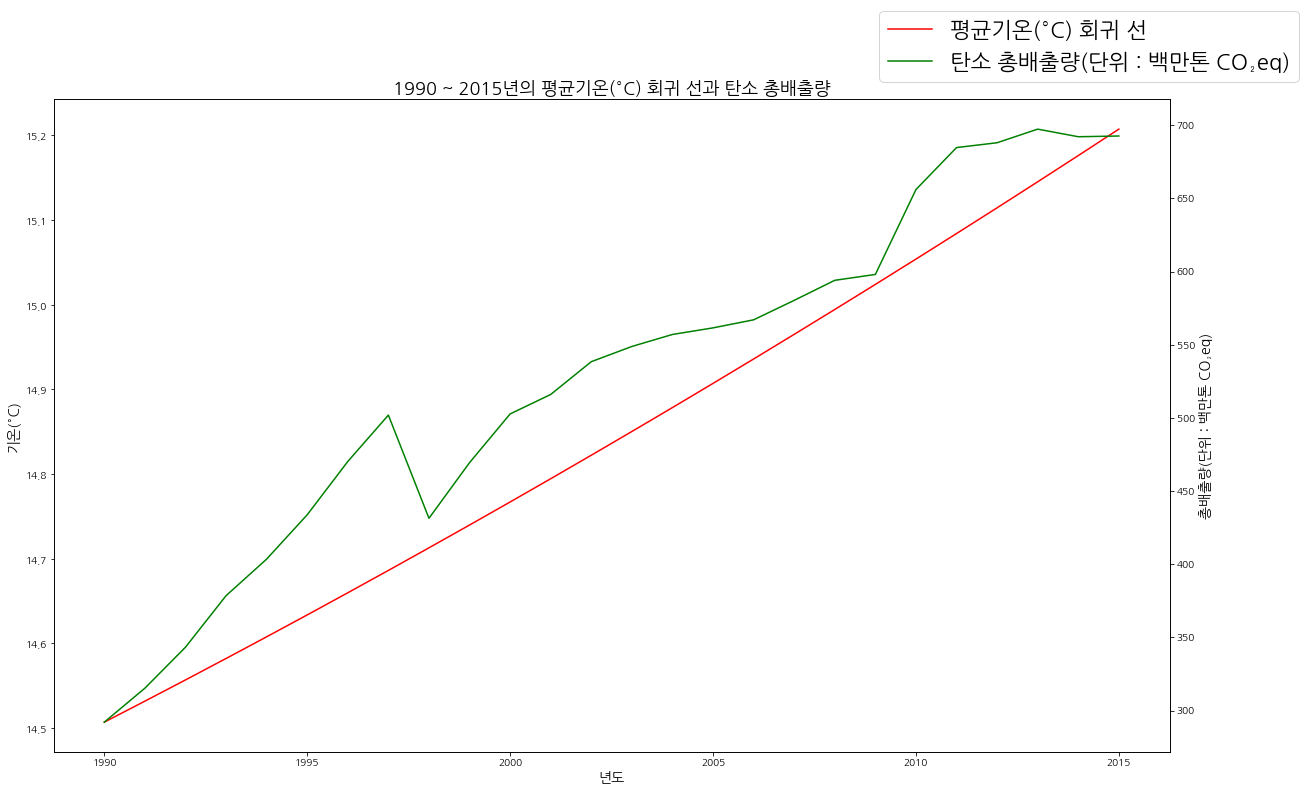

In [ ]:
fig, ax1 = plt.subplots() # fig와 ax1에 plt.subplots()으로 다중 그래프 그릴 수 있게 설정
fig.set_figwidth(20) # fig 가로 사이즈를 20으로 설정
fig.set_figheight(12) # fig 그래프 세로 사이즈를 12로 설정
ax1.plot(res['평균기온(°C) 회귀 선'], c = 'r', label = '평균기온(°C) 회귀 선') # ax1의 선을 그음. 색깔은 빨간색으로, 라벨 이름은 '평균기온 회귀 선'으로 설정, 
ax2 = ax1.twinx() # ax2의 변수에, ax1과 축을 공유하게 설정(?
ax2.plot(res['탄소 총배출량'], c = 'g', label = '탄소 총배출량(단위 : 백만톤 CO₂eq)') # ax2의 선을 그음. 색깔은 초록색으로, 라벨 이름은 '탄소 총배출량'으로 설정.
ax1.set_title(str(start_year) + ' ~ ' + str(end_year) + '년의 평균기온(°C) 회귀 선과 탄소 총배출량', fontsize = 18) # ax1의 그래프의 제목을 'start_year(1990) ~ end_year(2015)' 년의 ~ 을 제목으로 설정
ax1.set_xlabel('년도', fontsize = 14) # ax1 그래프의 x축 이름을 '년도', 폰트 크기를 14로 설정
ax1.set_ylabel('기온(°C)', fontsize = 14) # ax1 그래프의 y축 이름을 '기온~'으로 폰트 크기를 14로 설정
ax2.set_ylabel('총배출량(단위 : 백만톤 CO₂eq)', fontsize = 14) # ax2 그래프의 y축 이름을 '총배출량~' 폰트 사이즈를 14로 설정
fig.legend(fontsize = 22) # 범례를 적합한 위치에 폰트 사이즈는 22로 설정

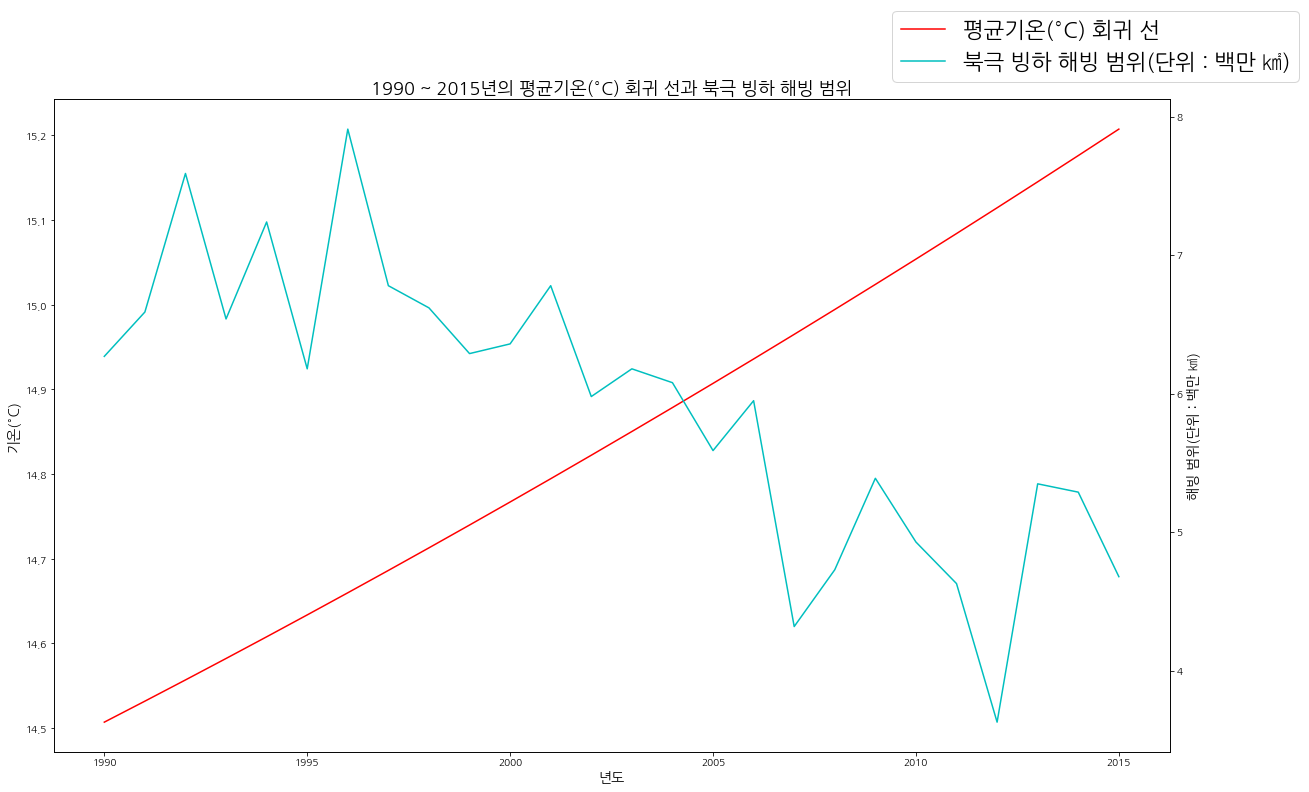

In [ ]:
fig, ax1 = plt.subplots() # fig와 ax1에 plt.subplots()으로 다중 그래프 그릴 수 있게 설정
fig.set_figwidth(20) # 그래프 사이즈를 가로:20 으로 설정
fig.set_figheight(12) # 그래프 사이즈를 세로:12 로 설정
ax1.plot(res['평균기온(°C) 회귀 선'], c = 'r', label = '평균기온(°C) 회귀 선') # ax1 선 긋기. 평균기온 회귀 선을 긋고, 색깔은 빨간색으로 설정, 라벨 이름을 '평균기온 회귀 선'으로 설정
ax2 = ax1.twinx() # ax2에 ax1의 축을 공유하도록 대입.
ax2.plot(res['북극 빙하 해빙 범위'], c = 'c', label = '북극 빙하 해빙 범위(단위 : 백만 ㎢)') # ax2에 선 긋기, '북극 빙하 해빙 범위' 데이터들을 대입, 색깔은 파란색으로 설정, 라벨 이름을 '북극 빙하 해빙 범위'로 설정
ax1.set_title(str(start_year) + ' ~ ' + str(end_year) + '년의 평균기온(°C) 회귀 선과 북극 빙하 해빙 범위', fontsize = 18) # ax1 그래프 제목을 설정.
ax1.set_xlabel('년도', fontsize = 14) # ax1 그래프 x축 이름을 설정 '년도' 폰트 사이즈 14로 설정
ax1.set_ylabel('기온(°C)', fontsize = 14) # ax1 그래프 y축 이름을 설정 '기온' 폰트 사이즈 14로 설정
ax2.set_ylabel('해빙 범위(단위 : 백만 ㎢)', fontsize = 14) # ax2 그래프 y축 이름을 설정 '해빙 범위' 폰트 사이즈 14로 설정
fig.legend(fontsize = 22) # 범례를 적합한 장소에 폰트 사이즈 22로 설정

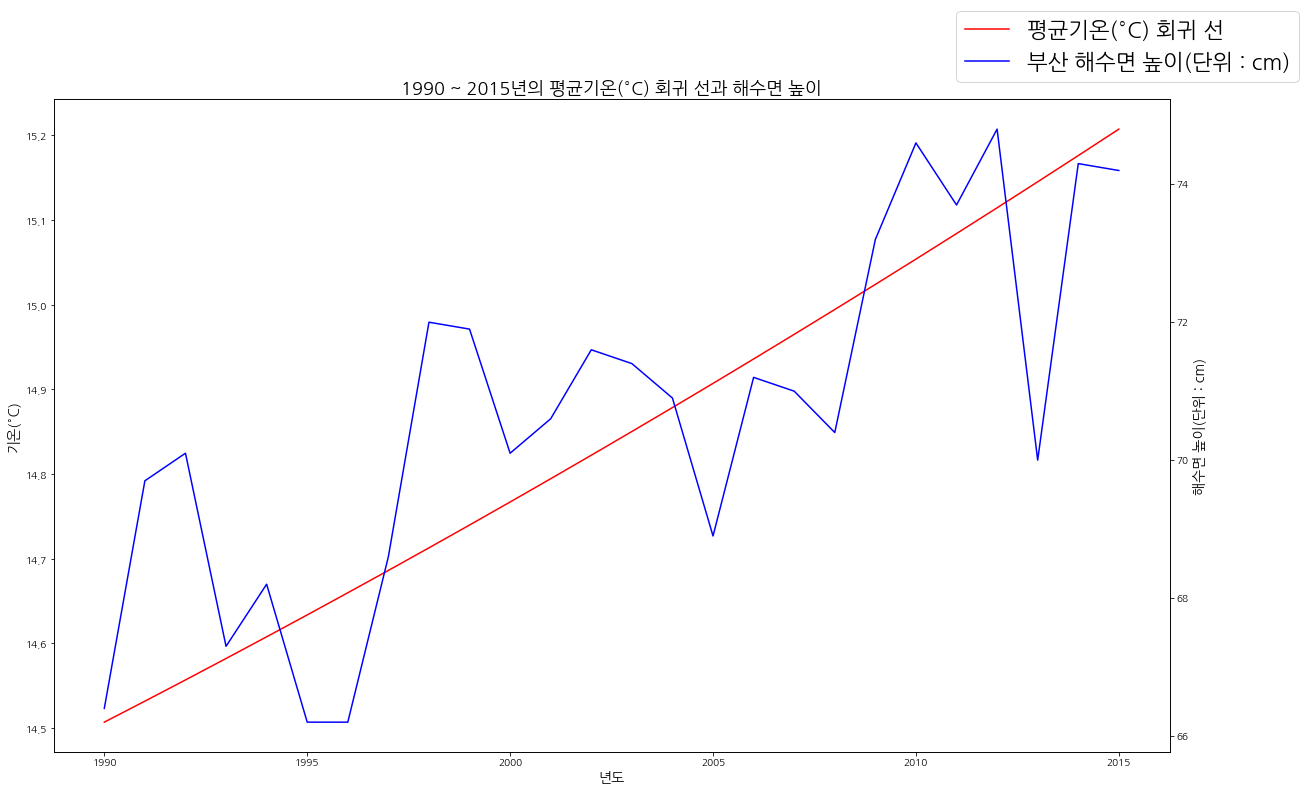

In [ ]:
fig, ax1 = plt.subplots() # fig와 ax1에 plt.subplots()으로 다중 그래프 그릴 수 있게 설정
fig.set_figwidth(20) # fig의 그래프 사이즈 가로:20 으로 설정
fig.set_figheight(12) # fig의 그래프 사이즈 세로:12 로 설정
ax1.plot(res['평균기온(°C) 회귀 선'], c = 'r', label = '평균기온(°C) 회귀 선') # ax1 선 긋기, '평균기온 회귀 선', 색 = 빨간색, 라벨 이름을 '평균기온 회귀 선'으로 설정
ax2 = ax1.twinx() # ax2에 ax1의 축을 공유하여 대입.
ax2.plot(res['부산 해수면 높이'], c = 'b', label = '부산 해수면 높이(단위 : cm)') # ax2의 선 긋기, '부산 해수면 높이', 색 = 파란색, 라벨 이름을 '부산 해수면 높이'로 설정
ax1.set_title(str(start_year) + ' ~ ' + str(end_year) + '년의 평균기온(°C) 회귀 선과 해수면 높이', fontsize = 18) # ax1의 제목을 설정
ax1.set_xlabel('년도', fontsize = 14) # ax1의 x축 이름을 '년도'로 설정하고, 폰트 사이즈를 14로 설정
ax1.set_ylabel('기온(°C)', fontsize = 14) # ax1의 y축 이름을 '기온'으로 설정하고, 폰트 사이즈를 14로 설정
ax2.set_ylabel('해수면 높이(단위 : cm)', fontsize = 14) # ax2의 y축 이름을 '해수면 높이'로 설정하고, 폰트 사이즈를 14로 설정
fig.legend(fontsize = 22) # 범례를 적합한 장소에 폰트 사이즈 22로 설정

(-0.5, 616.5, 250.5, -0.5)

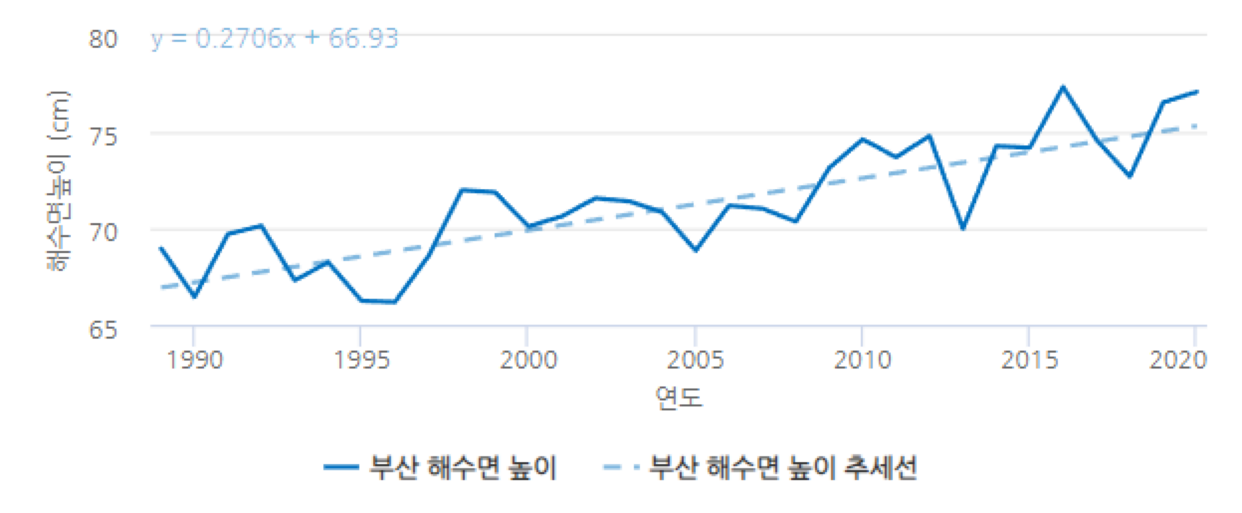

In [ ]:
import matplotlib.image as img # 맷플롯립의 이미지 모듈을 img 이름으로 불러옴

im = img.imread(path + 'BusanSeaLevelLine.PNG') # 맷플롯립의 img.imread함수를 통해, path(깃허브 경로) + BusanSeaLevelLine.PNG 파일 경로를 im 변수에 저장
plt.figure(figsize = (22, 22)) # 이미지 사진을 가로:22, 세로:22 사이즈로 설정
plt.imshow(im) # im 그래프를 출력
plt.axis('off') # 축 출력 안함

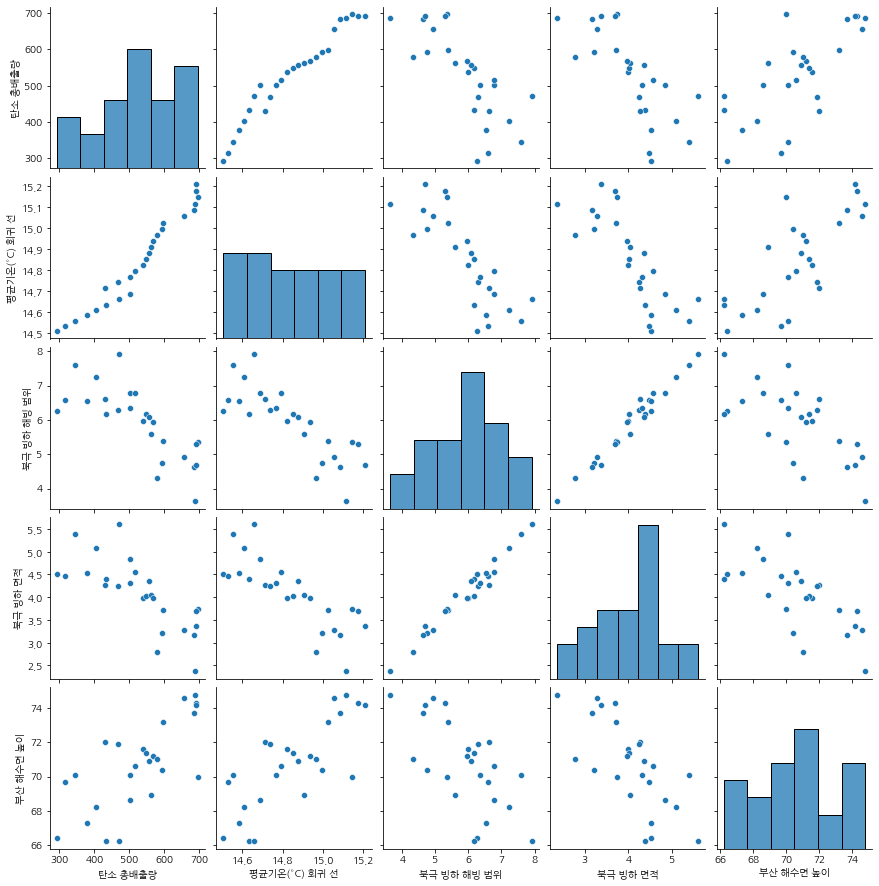

In [ ]:
import seaborn as sns # seaborn 모듈을 sns 이름으로 불러옴

sns.pairplot(res) # sns.pairplot(res)로 쌍그래프를 그려서 데이터간의 상관관계를 보여줌. res의 요소들: 탄소 배출량, 평균기온 회귀 선, 북극 빙하 해빙 범위, 북극 빙하 면적, 부산 해수면 높이

In [ ]:
from statsmodels.tsa.arima_model import ARIMA # statsmodel.tsa.arima_model 파일에서 ARIMA 모듈을 임포트 한다.
import warnings # warnings 모듈 임포트

warnings.filterwarnings(action = 'ignore') # 경고 메시지를 무시하고 숨기기

def auto_arima(data, order): # auto_arima 이름을 가진 함수를 선언하고, 매개 변수에 data, order을 인자로 입력.
  order_list = [] # order_list라는 이름의 리스트 변수 선언
  aic_list = [] # aic_list라는 이름의 리스트 변수 선언

  for p in range(order[0]): #입력된 리스트 수의 0번째 요소만큼 반복
    for d in range(order[1]): # 입력된 리스트 수의 1번째 요소만큼 반복
      for q in range(order[2]): # 입력된 리스트 수의 2번째 요소만큼 반복
        model = ARIMA(data, order=(p, d, q)) # 모델이라는 변수에, ARIMA 모델링을 생성, 총배출량 데이터 프레임을 넣고, 

        try: # 예외처리하기
          model_fit = model.fit() # model_fit 변수에 model에 저장된 ARIMA 모델에 적합한 모델로 수정
          c_order = f'p{p} d{d} q{q}' # 문자열앞에 f를 붙여서 문자열내에 {} 로 묶은 변수들을 변수명을 사용해서 그대로 변수값을 출력
          aic = model_fit.aic # AIC는 Akaike Information Criterion 의 약자, BIC는 Bayesian Information Criterion의 약자
          #AIC와 BIC는 모두 모형이 복잡해 질수록 패널티를 부여, AIC는 패널티를 (모형 파라미터의 갯수) 곱하기 2로, BIC는 (모형 파라미터의 갯수) 곱하기 log(n)으로 약속
          #AIC의 패널티는 표본 크기에 상관없이 일정하지만, BIC의 패널티는 표본 크기가 커질수록 함께 커짐
          #AIC는 두 확률분포 사이의 차이를 표현한 것입니다. 실제 데이터의 분포와, 모형이 예측하는 분포 사이의 차이입니다. 
          #AIC가 작다는 것은 모형이 자료의 진짜 분포와 비슷하게 생겼다는 것
          #예측을 잘하고 싶을 때는 AIC를 주로, 실제 데이터의 분포를 잘 알고 싶을 때는 BIC를 주로 사용, 그러므로 AIC를 사용.
          #aic변수에 model_fit의 aic 값을 대입
          order_list.append(c_order) # order_list 리스트 변수에 c_order 값을 추가.
          aic_list.append(aic) #aic_list 리스트 변수에 aic 값을 추가.
        except: # 위의 코드에서 구문 에러가 났을 경우,
          pass # 에러를 무시함.

  result_df = pd.DataFrame(list(zip(order_list, aic_list)), columns = ['order', 'AIC']) # result_df에 order 열, AIC 열을 만듦, 행은 order과 aic_list을 합치고, 리스트화 시킴
  result_df.sort_values('AIC', inplace = True) # result_df의 데이터 프레임을 'AIC'열의 값들을 오름차순 하여, 데이터 프레임을 갱신
  return result_df #result_df 라는 데이터 프레임을 함수 반환값으로 설정

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = auto_arima(ce['총배출량'], [3, 3, 3]) # df 데이터 프레임을 auto_arima() 함수에 해당 매개변수들을 입력하여 나온 데이터 프레임을 저장
df # 데이터 프레임을 출력

,order,AIC
6,p0 d2 q1,262.150819
13,p1 d2 q2,263.762032
12,p1 d2 q1,263.895935
19,p2 d2 q1,264.759364
20,p2 d2 q2,266.844198
2,p0 d1 q0,267.490778
3,p0 d1 q1,269.348233
10,p1 d1 q0,269.389965
4,p0 d1 q2,270.671133
15,p2 d1 q0,270.772146


                             ARIMA Model Results                              
Dep. Variable:                D2.총배출량   No. Observations:                   28
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -129.289
Method:                       css-mle   S.D. of innovations             23.691
Date:                Wed, 01 Jun 2022   AIC                            262.578
Time:                        11:59:28   BIC                            265.243
Sample:                             2   HQIC                           263.393
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ma.L1.D2.총배출량    -0.9205      0.119     -7.725      0.000      -1.154      -0.687
                                    Roots                                    
                  Real          Imaginary   

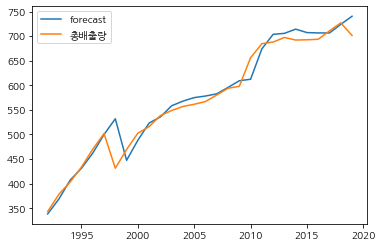

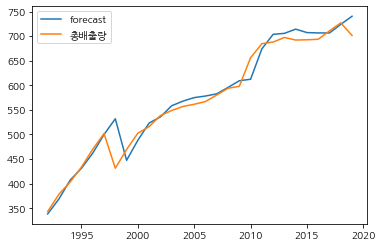

In [ ]:
model = ARIMA(ce['총배출량'], [0, 2, 1]) # model에 ARIMA에 탄소 csv의 총 배출량 데이터들을 넣어서, order값에 0(AR),2(차분),1(MA)을 넣음.
model_fit = model.fit(trend = 'nc', full_output = True, disp = True) #trend가 c = constant, nc = no constant,full_output = 모든 결과물 출력 여부, disp = 수렴 정보를 나타냄.
print(model_fit.summary()) # model_fit(아리마 모델)의 결과값을 출력합니다.
model_fit.plot_predict() # model_fit.plot_predict() 아리마 모델의 결과값을 그래프 형식으로 선으로 그림을 그려서 나타냄.

In [ ]:
#x = 탄소 배출량 값들을 다중 행 1열로 변환한 배열
#poly_x = 위의 x를 Poly 식에 넣음 => 다항식으로 변환
#x_pred = 탄소 배출량 값, 탄소 배출량 예측값을 합친 배열
#poly_x_pred = x_pred를 다항식으로 대입한 값
#scope = 예측을 원하는 년도 - 탄소 배출량의 마지막 년도 2015 ex). 2100 - 2015 = 85

#y = 평균 기온들 데이터의 넘파이 배열
#y_predict = 단항 선형회귀의 예측값
#poly_lr = 다항 선형회귀 모델
#poly_y_predict = 다항식 y 예측값
#poly_rmse = 다항식 루트 평균 제곱 오차
#rmse = 루트 평균 제곱 오차

def Predict_Temperature_With_Carbon(car, tem, year, add = 0): # Predict_Temperature_With_Carbon 함수 선언 후, 매개변수 (car, tem, year, 디폴트 add = 0) 대입
  scope = year - car.index[-1] #scope 변수에 밑의 블록에서 구하고자 하는 년도(year) - car.index[-1](2015, 탄소 배출량의 마지막 년도) scope 변수에 85 대입
  
  x = np.array(car).reshape(-1, 1) # x 변수에 탄소 배출량 데이터 프레임의 실 값들을 다중 행 1열 형식으로 변환.
  poly_x = Poly(x) # poly_x 변수에 Poly(x[실 값, 다중 행, 1열])을 넣어서, 다항식으로 변환 후, 대입.
  x_pred = np.concatenate([car.values, model_fit.forecast(steps = scope)[0]]).reshape(-1, 1) + add # x_pred 변수에 [탄소 배출량]의 값들, model_filt의 forecast(예측)함수에 steps = scope[0] 대입, 다중행, 1열 형식으로 형 변환, 탄소 배출량을 원하는 만큼 더함. 그 후, 넘파이 concatenate 함수로 배열들을 합침.(탄소 배출량 값과, 예측값+탄소량)
  poly_x_pred = Poly(x_pred) # 위에서 합친 배열을 Poly함수에 넣어서 다항식으로 만든것을 poly_x_pred에 대입.
  y = np.array(tem) # y값에 평균기온들의 데이터를 넘파이 배열화 시킴.
  
  lr = LinearRegression() # lr에 선형회귀 모델링 생성
  lr.fit(x, y) # lr 선형회귀 모델에 x,y 변수값들을 대입하여 모델을 수정
  y_predict = lr.predict(x) # y_predict에 선형 회귀 모델에 (x) 값들을 넣어서, y예측값 얻기.
  rmse = np.sqrt(mean_squared_error(y, y_predict)) # y와 y예측한 값의 평균 제곱 오차를 구한 것의 제곱근을 구해서 rmse 변수에 대입.
  # RMSE:(루트 평균 제곱 오차), MSE : (평균 제곱 오차) RMD (루트 평균 제곱 편차) 및 RMS : (루트 평균 제곱 오차)

  poly_lr = LinearRegression() # poly_lr에 선형회귀 모델링 생성
  poly_lr.fit(poly_x, y) # poly_lr의 선형회귀 모델에, 다항 식을 x값으로, y에 y(평균기온들 배열) 을 대입하여 모델 수정
  poly_y_predict = poly_lr.predict(poly_x) # poly_lr의 선형회귀 모델에, poly_x값을 대입해서, 예측값을 poly_y_predict 변수에 대입.
  poly_rmse = np.sqrt(mean_squared_error(y, poly_y_predict)) # y와 poly_y_predict의 평균 제곱 오차를 구한 후, 제곱근을 구한 값을 poly_rmse(루트 평균 제곱 오차에 대입)

  if rmse > poly_rmse: # 만약 rmse가 poly_rmse보다 클 경우 : 루트 평균 제곱 오차 > 다항 루트 평균 제곱 오차
    lr = poly_lr # lr의 선형 모델 대신 poly_lr(다항) 선형 모델을 대입.
    x_pred = poly_x_pred # x_pred 값에, poly_x_pred 값 대입
    y_predict = poly_y_predict # y_predict 값에, poly_y_predict 값 대입

  y_pred = lr.predict(x_pred) # y_pred에 선형 회귀 모델의 예측값에 (x_pred)값을 대입.

  return y_pred # 함수에서 y_pred 값을 반환.

### 최종 사용 코드 : 

                  예측 보고서(탄소 기준)
-------------------------------------------------------
2015년의 탄소 총배출량 : 692.6
2100년의 예측 탄소 총배출량 : 1582.481(0)
-------------------------------------------------------
2015년의 평균기온 평균값 : 15.207
2015년의 평균기온 최대값 : 16.294
2100년의 예측 평균기온 평균값 : 18.603
2100년의 예측 평균기온 최대값 : 19.69
-------------------------------------------------------
2015년의 북극 빙하 해빙 범위 : 4.68
2100년의 예측 북극 빙하 해빙 범위(기온 평균값) : 0.0
2100년의 예측 북극 빙하 해빙 범위(기온 최대값) : 0.0
-------------------------------------------------------
2015년의 북극 빙하 면적 : 3.37
2100년의 예측 북극 빙하 면적(기온 평균값) : 0.0
2100년의 예측 북극 빙하 면적(기온 최대값) : 0.0
-------------------------------------------------------
2015년의 부산 해수면 높이 : 74.2
2100년의 예측 부산 해수면 높이(기온 평균값) : 105.185
2100년의 예측 부산 해수면 높이(기온 최대값) : 115.165
-------------------------------------------------------


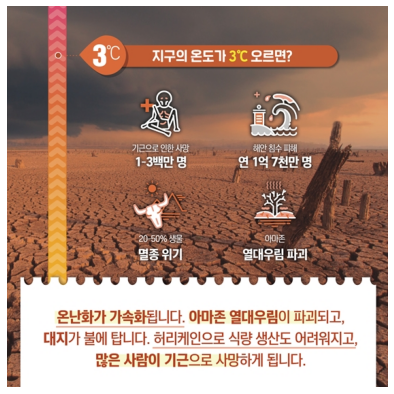

In [ ]:
#x = 탄소 배출량, 평균기온 회귀선
#scope =  년도에서 새로 데이터 프레임을 만든 res에서 탄소 총 배출량의 마지막 년도(2015) 값을 뺀 값
#tp_diff = 예측 최대 온도와 예측 온도의 차
#y = 평균기온 회귀선, 부산 해수면 높이
#y1 = 북극 빙하 해빙 범위
#y2 = 북극 빙하 면적
#carbon_pred = 탄소 예측값
#tp_pred = 다항회귀 모델에 넣어서 나온 예측 모델
#tp_pred_max = 다항회귀 모델에 넣어서 나온 최대 예측 모델
#extent_pred_max = 북극 빙하 해빙 범위 최대 예측값
#extent_pred = 북극 빙하 해빙 범위 예측값
#area_pred_max = 북극 빙하 면적 범위 최대 예측값
#area_pred = 북극 빙하 면적 범위 예측값
#sealevel_pred_max = 부산 해수면 최대 예측값
#sealevel_pred = 부산 해수면 예측값

#@title 기온 예측 보고서
year = 2100 #@param {type : 'slider', min : 2022, max : 2100, step : 1}
# year 변수값은 슬라이더가 움직일때마다 원하는 입력 값을 바꿀 수 있음.
carbon_check = True #@param {type : 'boolean'}
# carbon_check는 체크 박스에 체크가 되면 True, 체크가 없을 경우, False 값을 대입함.

if carbon_check: # 만약 carbon_check의 값이 true일 경우
  add_carbon = 0 #@param {type : 'slider', min : 0, max : 10000, step : 1}
  #add_carbon 의 변수값을 슬라이더 바로 설정할 수 있음.

  #탄소 예측
  scope = year - res['탄소 총배출량'].index[-1] # scope 변수에 입력된 년도(year)에서 새로 데이터 프레임을 만든 res에서 탄소 총 배출량의 마지막 년도(2015) 값을 뺌
  carbon_pred = model_fit.forecast(steps = scope)[0][-1] + add_carbon # 년도 값을 넣어서, 예측한 값을 탄소량 만큼 더한 후, carbon_pred에 대입.

  #기온 예측(탄소 기준)
  x = res['탄소 총배출량'] # x변수를 res 데이터 프레임의 '탄소 총배출량' 열로 설정
  y = res['평균기온(°C) 회귀 선'] # y변수를 res 데이터 프레임의 '평균기온 회귀선' 열로 설정

  tp_pred = Predict_Temperature_With_Carbon(x, y, year, add_carbon) # Predict_Temperature_With_Carbon 함수에 () 탄소 배출량, 평균기온 회귀 선, 예측 원하는 년도, 추가 탄소량(슬라이더 바)
  tp_pred = np.array(tp_pred[-1]).reshape(1) # 평균기온 예측 배열의 마지막 값을 배열화 시켜서,tp_pred에 저장
  tp_pred_max = tp_pred + tp_diff # 평균기온 예측 최대 온도 변수에, 평균기온 예측 값 + (최대 예측값-평균기온)을 더함
else: # 위의 carbon_check 값이 false 일 경우,
  #기온 예측(년도 기준)
  tp_pred, tp_pred_max = Predict_Temperature(tp['평균기온(°C)'], year, visual = False) # 
  tp_pred = np.array(tp_pred[-1]).reshape(1) # 평균기온 예측 배열의 마지막 값을 배열화 시켜서, tp_pred에 저장
  tp_pred_max = np.array(tp_pred_max[-1]).reshape(1) # 평균기온 예측 최대값 배열의 마지막 값을 배열화 시켜서, tp_pred_max에 저장.

#북극 빙하 해빙 범위, 면적 예측
x = res[['평균기온(°C) 회귀 선']] # x변수에 데이터 프레임의 평균기온 회귀 선의 열을 가져옴.
y1 = res['북극 빙하 해빙 범위'] # y1 변수에 데이터 프레임의 '북극 빙하 해빙 범위'열을 가져옴. 
y2 = res['북극 빙하 면적'] # y2 변수에 데이터 프레임의 '북극 빙하 면적' 열을 가져옴.

lr1 = LinearRegression() # lr1에 선형회귀 모델 생성
lr1.fit(x, y1) # lr1의 선형회귀 모델에 x,y1을 대입하여, 모델 수정

lr2 = LinearRegression() # lr2에 선형회귀 모델 생성
lr2.fit(x, y2) # lr2의 선형회귀 모델에 x,y2을 대입하여, 모델 수정

extent_pred = lr1.predict(tp_pred.reshape(1, -1)) # 북극 빙하 해빙 범위 예측 변수에, lr1 모델의 예측값에, 평균기온 예측값을, 1행 다중열로 배열을 변환후 예측
extent_pred_max = lr1.predict(tp_pred_max.reshape(1, -1)) # 북극 빙하 해빙 범위 예측 최대 변수에, lr 모델의 예측값에, 평균기온 예측 최대값을 1행 다중열로 배열 변환후 예측

if extent_pred < 0: # 만약 extent_pred(북극 빙하 해빙 범위)가 0보다 작다면,
  extent_pred = [0.0] # 북극 빙하 해빙 범위에 0을 대입

if extent_pred_max < 0: # 만약 extent_pred_max(북극 빙하 해빙 범위 최대값)이 0보다 작다면,
  extent_pred_max = [0.0] # 북극 빙하 해빙 범위 최대값에 0을 대입

area_pred = lr2.predict(tp_pred.reshape(1, -1)) # 북극 빙하 예측 면적 변수에, lr2의 모델의 예측값으로, 평균기온 예측값을, 1행 다중열로 배열을 변환 후 예측
area_pred_max = lr2.predict(tp_pred_max.reshape(1, -1)) # 북극 빙하 예측 면적 최대값 변수에, lr2의 모델의 예측값으로, 평균기온 예측 최대 값을 1행 다중열로 배열을 변환 후 예측

if area_pred < 0: # 북극 빙하 면적의 예측값이 0보다 작다면
  area_pred = [0.0] # 북극 빙하 면적의 예측값에 0을 대입

if area_pred_max < 0: # 북극 빙하 면적의 최대 예측값이 0보다 작다면
  area_pred_max = [0.0] # 북극 빙하 면적의 최대 예측값에 0을 대입

#부산 해수면 높이 예측
x = res[['평균기온(°C) 회귀 선']] # x를 평균 기온 회귀 선의 열로 데이터 프레임을 만듦
y = res['부산 해수면 높이'] # y를 부산 해수면 높이 열로 데이터 프레임을 만듦

lr = LinearRegression() # lr에 선형회귀 모델 생성
lr.fit(x, y) # lr에 평균기온 회귀 선과 부산 해수면 높이를 대입하여 모델 수정

sealevel_pred = lr.predict(tp_pred.reshape(1, -1)) #sealevel_pred(부산 해수면 높이 예측) 변수에 lr 선형 모델의 예측모델에, 년도 배열을 다항식으로 바꾼 값을 대입.
sealevel_pred_max = lr.predict(tp_pred_max.reshape(1, -1)) #sealevel_pred(부산 해수면 높이 예측 최대값) 변수에 lr 선형 모델의 예측 모델에, 년도 배열의 최대값들을 대입

#예측 보고서 출력
if carbon_check: # 만약 carbon_check의 값이 true일 경우
  print(' ' * 18 + '예측 보고서(탄소 기준)') # 공백 18칸 생성, 예측 보고서(탄소 기준)으로 출력
  print('-' * 55) # - 55개 출력
  print(str(res.index[-1]) + '년의 탄소 총배출량 :', res['탄소 총배출량'].iloc[-1]) #res.index(새로 만든 데이터 프레임 res의 마지막 년도 값) + 문자열 + res의 탄소 총배출량의 마지막 데이터 값
  print(str(year) + '년의 예측 탄소 총배출량 : ' + str(round(carbon_pred, 3)) + '(' + str(add_carbon) + ')') # 예측하고자 하는 년도(year) 출력, 문자열 출력, 탄소 예측량(carbon_pred)을 3자리까지 반올림, 이후 추가하고자 하는 탄소량 을 출력
else: # 위의 carbon_check가 true가 아닐 경우
  print(' ' * 18 + '예측 보고서(년도 기준)') # 공백 18칸 생성, 예측 보고서(년도 기준)으로 출력

print('-' * 55) # - 55개 출력
print(str(res.index[-1]) + '년의 평균기온 평균값 :', round(res['평균기온(°C) 회귀 선'].iloc[-1], 3)) #res 데이터 프레임의 마지막 인덱스 값(년도) + 문자열 + 평균기온 회귀선의 마지막 값을 3자리까지 반올림
print(str(res.index[-1]) + '년의 평균기온 최대값 :', round(res['평균기온(°C) 회귀 선'].iloc[-1] + tp_diff, 3)) # res 데이터 프레임의 마지막 인덱스 값(년도) + 문자열 + 평균기온 회귀선의 마지막값에 최대 오차값을 더해서 3자리까지 반올림
print(str(year) + '년의 예측 평균기온 평균값 :', round(*tp_pred, 3)) # *:리스트 괄호없이 출력, 원하는 년도의 평균기온 예측 값을 출력 반올림 3자리.
print(str(year) + '년의 예측 평균기온 최대값 :', round(*tp_pred_max, 3)) # *:리스트 괄호없이 출력, 원하는 년도의 평균기온 예측 최대 오차값을 더해 출력, 반올림 3자리.
print('-' * 55) # - 55개 출력
print(str(res.index[-1]) + '년의 북극 빙하 해빙 범위 :', round(res['북극 빙하 해빙 범위'].iloc[-1], 3)) # 북극 빙하 해빙 범위 csv 파일의 가장 마지막 년도, 가장 마지막 값을 출력, 소수점 3자리까지 반올림 출력.
print(str(year) + '년의 예측 북극 빙하 해빙 범위(기온 평균값) :', round(*extent_pred, 3)) # *:리스트 괄호없이 출력, 원하는 년도의 북극 빙하 해빙 범위 예측값을 출력 반올림 3자리
print(str(year) + '년의 예측 북극 빙하 해빙 범위(기온 최대값) :', round(*extent_pred_max, 3)) # *:리스트 괄호없이 출력, 원하는 년도의 북극 빙하 해빙 범위 최대 예측값을 출력 반올림 3자리
print('-' * 55) # - 55개 출력
print(str(res.index[-1]) + '년의 북극 빙하 면적 :', round(res['북극 빙하 면적'].iloc[-1], 3)) # 북극 빙하 면적 csv파일의 마지막 인덱스 값(년도)와 북극 빙하 면적의 마지막 값을 소수점 3자리에서 반올림 출력.
print(str(year) + '년의 예측 북극 빙하 면적(기온 평균값) :', round(*area_pred, 3)) # *:리스트 괄호없이 출력, 원하는 년도의 북극 빙하 면적 예측값을 출력 반올림 3자리
print(str(year) + '년의 예측 북극 빙하 면적(기온 최대값) :', round(*area_pred_max, 3)) # *:리스트 괄호없이 출력, 원하는 년도의 북극 빙하 면적 최대 예측값을 출력 반올림 3자리
print('-' * 55) # - 55개 출력
print(str(res.index[-1]) + '년의 부산 해수면 높이 :', round(res['부산 해수면 높이'].iloc[-1], 3)) # 부산 해수면 높이 csv 파일의 마지막 인덱스 값(년도)와 부산 해수면 높이의 마지막 값을 소수점 3자리에서 반올림 출력.
print(str(year) + '년의 예측 부산 해수면 높이(기온 평균값) :', round(*sealevel_pred, 3)) # *:리스트 괄호없이 출력, 원하는 년도의 부산 해수면 높이 예측값을 출력 반올림 3자리
print(str(year) + '년의 예측 부산 해수면 높이(기온 최대값) :', round(*sealevel_pred_max, 3)) # *:리스트 괄호없이 출력, 원하는 년도의 부산 해수면 높이 최대 예측값을 출력 반올림 3자리
print('-' * 55) # - 55개 출력

diff = int(round(*tp_pred - res['평균기온(°C) 회귀 선'].iloc[-1], 0)) #

if diff > 0: # diff가 0보다 크다면,
  import matplotlib.image as img # matplotlib.image모듈을 가져와서 img라는 이름으로 정의
  im_lst = [path + 'Temperature' + str(i) + '.PNG' for i in range(1, 7)] # im_list에 리스트 형식으로 Temperature1~6까지의 이미지 파일 경로를 저장
  if diff > 6: # diff가 6보다 크다면,
    diff = 6 # diff를 6으로 설정

  im = img.imread(im_lst[diff-1]) # im에 im_lst 리스트에 존재하는 적합한 요소의 경로를 저장함.
  plt.figure(figsize = (7, 7)) # 그래프의 사이즈를 가로:7, 세로:7로 설정
  plt.axis('off') # 이미지 띄우는 그래프의 축을 없앰.
  plt.imshow(im) # im 경로 변수에 있는 이미지를 띄워줌.

# 참고 자료

### 사용자 인터페이스 테스트

In [ ]:
#@title 기온 예측값 GUI Test

text = '' #@param {type : "string"}
dropdown = '1st option' #@param ["1st option", "2nd option", "3nd option"]
text_and_dropdown = '2nd option' #@param ["1st option", "2nd option", "3nd option"]
date_input="2022-05-21" #@param{type : "date"}
number_input=10.0 #@param{type : "number"}
number_slider = -1 #@param{type : "slider", min : -1, max : 1,step : 0.1}

integer_input = 10 #@param {type : "integer"}
integer_slider = 1960 #@param {type : "slider", min : 1960, max : 2100, step : 1}

boolean_checkbox = False #@param {type : 'boolean'}
boolean_dropdown = True #@param ["False", "True"]{type : "raw"}

### 함수 구현부

In [ ]:
'https://student9725.tistory.com/28' #AIC, BIC 설명
'https://byeongkijeong.github.io/ARIMA-with-Python/' #pz, coef, adf 등 설명 + forecaset 결과 설명
'https://bluemumin.github.io/adp/2021/03/10/ADP-20%ED%9A%8C-ADP-%EC%8B%A4%EA%B8%B0-python-%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D(Arima,-%EC%9E%94%EC%B0%A8%EB%B6%84%EC%84%9D)/' #귀무가설, pz, adf 등 설명
'https://www.statsmodels.org/0.6.1/generated/statsmodels.tsa.arima_model.ARIMA.fit.html' #ARIMA 모델 fit 함수 인자 설명

'https://www.statsmodels.org/0.6.1/generated/statsmodels.tsa.arima_model.ARIMA.fit.html'

### 영상 자료

In [ ]:
"https://www.youtube.com/watch?v=0aTaZYbg9_s&feature=youtu.be" # 지구 온도 예측값 증빙 자료

'https://www.youtube.com/watch?v=0aTaZYbg9_s&feature=youtu.be'